In [1]:
import efel

from bluepy.v2 import Simulation

from bluepy.v2 import Circuit
from bluepy.v2 import Cell
from bluepy.v2.enums import Synapse

from os import path
import sys

import pandas as pd
import numpy as np

from sklearn import linear_model
from scipy import stats

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

import pickle

import h5py

In [2]:
percent_gids = '10'

In [3]:
circuit_f = '/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig'


In [3]:
#sim_fullMet_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig'
#sim_genMet_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_nostim/BlueConfig'
#sim_noMet_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim/BlueConfig'

sim_fullMet_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/other/met_gen_nostim/BlueConfig'  # tmp to not change code, replace with full met later
sim_genMet_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/sim/setup_sim/sim4fig/gen_diff_pulses/linamp1long/BlueConfig'
sim_noMet_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim_noSkip/BlueConfig'

feature_values_fullMet_f1 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_met_full_nostim_f1.pickle'
feature_values_fullMet_f2 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_met_full_nostim_f2.pickle'

feature_values_genMet_f1 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_met_gen_nostim_f1.pickle'
feature_values_genMet_f2 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_met_gen_nostim_f2.pickle'

feature_values_noMet_f1 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_nomet_nostim_f1.pickle'
feature_values_noMet_f2 = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/out_data/efel_nomet_nostim_f2.pickle'

onepercent_gids_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_onepercent_allLayers_EXCandINH_gids.txt'
tenpercent_gids_f = '/gpfs/bbp.cscs.ch/project/proj34/metabolismndam/in_data/mc2_tenpercent_allLayers_EXCandINH_gids.txt'


def get_cells(circuit_f,percent_gids,onepercent_gids_f,tenpercent_gids_f):
    c = Circuit(circuit_f)
    mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.ETYPE,Cell.MTYPE])
    mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}

    if percent_gids == '1':
        print("work with 1% of cells")
        percent_gids = np.loadtxt(onepercent_gids_f)
    elif percent_gids == '10':
        print("work with 10% of cells")
        percent_gids = np.loadtxt(tenpercent_gids_f)
    subset_cells = mc2_cells.loc[percent_gids,:]
    subset_cells['etype_mtype'] = subset_cells['etype'].astype(str) + "_" + subset_cells['mtype'].astype(str)
    subset_cells.index = subset_cells.index.astype(int)
    subset_cells = subset_cells.reset_index()
    subset_cells = subset_cells.rename(columns={'index':'c_gid'})

    return subset_cells


print("get cells subset")
subset_cells = get_cells(circuit_f,percent_gids,onepercent_gids_f,tenpercent_gids_f)

subset_cells.head()

get cells subset
work with 10% of cells


c_gid           x            y           z synapse_class  layer   etype  \
0  117683  495.373722  1784.176664  707.349048           EXC      2  cADpyr   
1  115364  195.562723  1814.744163  517.438366           EXC      2  cADpyr   
2  125428  545.337659  1776.274947  683.863925           EXC      2  cADpyr   
3  119457  514.030369  1849.569922  697.390949           EXC      2  cADpyr   
4  120662  420.799894  1813.112032  471.310522           EXC      2  cADpyr   

      mtype      etype_mtype  
0  L2_TPC:B  cADpyr_L2_TPC:B  
1    L2_IPC    cADpyr_L2_IPC  
2  L2_TPC:B  cADpyr_L2_TPC:B  
3  L2_TPC:B  cADpyr_L2_TPC:B  
4  L2_TPC:B  cADpyr_L2_TPC:B

In [ ]:
#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig ../out_data/efel_met_full_nostim_f1.pickle 1

#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_nostim/BlueConfig ../out_data/efel_met_full_nostim_f2.pickle 2

#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_nostim/BlueConfig ../out_data/efel_met_gen_nostim_f1.pickle 1

#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/met_gen_nostim/BlueConfig ../out_data/efel_met_gen_nostim_f2.pickle 2

#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim/BlueConfig ../out_data/efel_nomet_nostim_f1.pickle 1

#python getAllEfel_10percentGids.py /gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_nostim/BlueConfig ../out_data/efel_nomet_nostim_f2.pickle 2


In [4]:
# full met

with open(feature_values_fullMet_f1, 'rb') as handle:
    feature_values_fullMet_1 = pickle.load(handle)
    
with open(feature_values_fullMet_f2, 'rb') as handle:
    feature_values_fullMet_2 = pickle.load(handle)
    
fr_fullMet_1 = pd.DataFrame(feature_values_fullMet_1)

fr_fullMet_2 = pd.DataFrame(feature_values_fullMet_2)

fr_fullMet = pd.concat([fr_fullMet_1,fr_fullMet_2])

print((len(fr_fullMet_1)+len(fr_fullMet_2))/len(fr_fullMet))

fr_fullMet_t = fr_fullMet.transpose()

fr_fullMet_t = fr_fullMet_t.reset_index()

fr_fullMet_t = fr_fullMet_t.rename(columns = {'index':'gid'})

fr_fullMet_t['gid']=fr_fullMet_t['gid'].astype(int)

fr_fullMet_t.head()

1.0


gid  AP_amplitude  AP_height  AP_duration_half_width  mean_frequency  \
0  117683     92.895100  40.400414                0.628736       17.438364   
1  115364     96.932954  43.683866                0.641026        7.972525   
2  125428     96.253924  43.559909                0.674648       14.388781   
3  119457     98.056777  44.162929                0.620755       10.837116   
4  120662     94.836112  41.925648                0.621429       16.871196   

   AHP_depth  AHP_time_from_peak  voltage_base  time_to_first_spike  \
0   0.977468            3.314943    -64.989166                 34.4   
1  -5.316121            5.153846    -64.991844                 51.5   
2  -5.794785            7.722535    -64.974518                 30.1   
3  -6.276713            3.350943    -64.991699                 26.5   
4   0.128138            3.216667    -64.991272                 28.8   

   time_to_last_spike  ...  inv_last_ISI  AHP_depth_abs  Spikecount  \
0              4989.0  ...     20.533881     -64.011698        87.0   
1              4891.8  ...      8.319468     -70.307965        39.0   
2              4934.4  ...     19.230769     -70.769303        71.0   
3              4890.6  ...     13.966480     -71.268412        53.0   
4              4978.9  ...     34.482759     -64.863134        84.0   

   amp_drop_first_last  irregularity_index  max_amp_difference  \
0            17.093838           16.472941            5.781124   
1            10.610283           64.589189            4.065112   
2            14.800621           15.005797            4.573677   
3            11.340042           36.131373            5.744197   
4            14.801323           26.897561            4.540107   

   maximum_voltage  mean_AP_amplitude  peak_voltage  spike_half_width  
0        51.303379          92.895100     40.400414          0.587008  
1        50.561691          96.932954     43.683866          0.626571  
2        53.061771          96.253924     43.559909          0.681297  
3        51.784126          98.056777     44.162929          0.619397  
4        51.679192          94.836112     41.925648          0.596994  

[5 rows x 27 columns]

In [5]:
# gen met

with open(feature_values_genMet_f1, 'rb') as handle:
    feature_values_genMet_1 = pickle.load(handle)
    
with open(feature_values_genMet_f2, 'rb') as handle:
    feature_values_genMet_2 = pickle.load(handle)
    
fr_genMet_1 = pd.DataFrame(feature_values_genMet_1)

fr_genMet_2 = pd.DataFrame(feature_values_genMet_2)

fr_genMet = pd.concat([fr_genMet_1,fr_genMet_2])

print((len(fr_genMet_1)+len(fr_genMet_2))/len(fr_genMet))

fr_genMet_t = fr_genMet.transpose()

fr_genMet_t = fr_genMet_t.reset_index()

fr_genMet_t = fr_genMet_t.rename(columns = {'index':'gid'})

fr_genMet_t['gid']=fr_genMet_t['gid'].astype(int)

fr_genMet_t.head()

1.0


gid  AP_amplitude  AP_height  AP_duration_half_width  mean_frequency  \
0  117683     93.484017  40.819358                0.643373       16.782934   
1  115364     97.597831  44.306329                0.642500        8.095527   
2  125428     96.115583  43.408656                0.680519       15.578215   
3  119457     98.263378  44.308473                0.635000       12.168411   
4  120662     94.264254  41.436409                0.639560       18.249639   

   AHP_depth  AHP_time_from_peak  voltage_base  time_to_first_spike  \
0   3.083071            4.846988    -64.989166                 34.4   
1  -2.976423            5.797500    -64.991844                 51.5   
2  -3.353865            9.492208    -64.974518                 30.1   
3  -3.384606            4.428333    -64.991699                 26.5   
4   2.688549            3.992308    -64.991272                 28.8   

   time_to_last_spike  ...  inv_last_ISI  AHP_depth_abs  Spikecount  \
0              4945.5  ...     19.011407     -61.906096        83.0   
1              4941.0  ...      7.315289     -67.968268        40.0   
2              4942.8  ...     14.749263     -68.328382        77.0   
3              4930.8  ...     13.605442     -68.376306        60.0   
4              4986.4  ...     20.576132     -62.302723        91.0   

   amp_drop_first_last  irregularity_index  max_amp_difference  \
0            14.972378           24.467901            5.781124   
1             6.735718           65.318421            3.997860   
2            13.152931           17.024000            4.465667   
3            12.485703           19.937931            5.189667   
4            15.831047           27.734831            4.158436   

   maximum_voltage  mean_AP_amplitude  peak_voltage  spike_half_width  
0        51.303379          93.484017     40.819358          0.576154  
1        50.561691          97.597831     44.306329          0.636240  
2        53.061771          96.115583     43.408656          0.683194  
3        52.069984          98.263378     44.308473          0.618509  
4        51.679192          94.264254     41.436409          0.582405  

[5 rows x 27 columns]

In [6]:
# no met

with open(feature_values_noMet_f1, 'rb') as handle:
    feature_values_noMet_1 = pickle.load(handle)
    
with open(feature_values_noMet_f2, 'rb') as handle:
    feature_values_noMet_2 = pickle.load(handle)
    
fr_noMet_1 = pd.DataFrame(feature_values_noMet_1)

fr_noMet_2 = pd.DataFrame(feature_values_noMet_2)

fr_noMet = pd.concat([fr_noMet_1,fr_noMet_2])

print((len(fr_noMet_1)+len(fr_noMet_2))/len(fr_noMet))

fr_noMet_t = fr_noMet.transpose()

fr_noMet_t = fr_noMet_t.reset_index()

fr_noMet_t = fr_noMet_t.rename(columns = {'index':'gid'})

fr_noMet_t['gid']=fr_noMet_t['gid'].astype(int)

fr_noMet_t.head()

1.0


gid  AP_amplitude  AP_height  AP_duration_half_width  mean_frequency  \
0  117683     82.674626  31.008367                0.702500       16.077494   
1  115364     90.509083  37.918404                0.670000        8.137028   
2  125428     87.644746  35.449219                0.740541       14.938932   
3  119457     90.248314  37.058251                0.663462       10.598618   
4  120662     86.004228  33.585385                0.687654       16.337562   

   AHP_depth  AHP_time_from_peak  voltage_base  time_to_first_spike  \
0   3.103010            3.941250    -64.989166                 34.4   
1  -3.433378            5.477500    -64.991844                 51.5   
2  -3.302906            9.708108    -64.974518                 30.1   
3  -4.085662            3.353846    -64.991699                 26.5   
4   2.174349            3.508642    -64.991272                 28.8   

   time_to_last_spike  ...  inv_last_ISI  AHP_depth_abs  Spikecount  \
0              4975.9  ...     42.016807     -61.886156        80.0   
1              4915.8  ...      7.369197     -68.425222        40.0   
2              4953.5  ...     14.925373     -68.277424        74.0   
3              4906.3  ...     12.422360     -69.077362        52.0   
4              4957.9  ...     19.120459     -62.816923        81.0   

   amp_drop_first_last  irregularity_index  max_amp_difference  \
0            30.048027           32.055128            5.781124   
1            16.547989           57.850000            3.997860   
2            24.543940           15.997222            4.651466   
3            19.783377           35.664000            4.294060   
4            25.061142           23.996203            3.808411   

   maximum_voltage  mean_AP_amplitude  peak_voltage  spike_half_width  
0        51.303379          82.674626     31.008367          0.681806  
1        50.561691          90.509083     37.918404          0.683742  
2        53.061771          87.644746     35.449219          0.757634  
3        50.925911          90.248314     37.058251          0.679331  
4        51.679192          86.004228     33.585385          0.660104  

[5 rows x 27 columns]

In [7]:
print("ini: ",len(fr_fullMet_t))
fr_fullMet_t = fr_fullMet_t.dropna()
print(len(fr_fullMet_t))

print("ini: ",len(fr_genMet_t))
fr_genMet_t = fr_genMet_t.dropna()
print(len(fr_genMet_t))

print("ini: ",len(fr_noMet_t))
fr_noMet_t = fr_noMet_t.dropna()
print(len(fr_noMet_t))

ini:  2291
2179
ini:  2294
2176
ini:  2290
2208


In [8]:
fr_fullMet_t = fr_fullMet_t.reset_index(drop=True)
fr_genMet_t = fr_genMet_t.reset_index(drop=True)
fr_noMet_t = fr_noMet_t.reset_index(drop=True)

In [9]:
# common gids

set_gids_met = list(set(fr_fullMet_t['gid'].unique().tolist()) & set(fr_genMet_t['gid'].unique().tolist()))
set_gids = list(set(set_gids_met) & set(fr_noMet_t['gid'].unique().tolist()))


In [10]:
len(set_gids)

2149

In [11]:
fr_fullMet_t = fr_fullMet_t.loc[fr_fullMet_t['gid'].isin(set_gids)]
fr_genMet_t = fr_genMet_t.loc[fr_genMet_t['gid'].isin(set_gids)]
fr_noMet_t = fr_noMet_t.loc[fr_noMet_t['gid'].isin(set_gids)]

In [12]:
fr_fullMet_t = fr_fullMet_t.reset_index(drop=True)
fr_genMet_t = fr_genMet_t.reset_index(drop=True)
fr_noMet_t = fr_noMet_t.reset_index(drop=True)

In [13]:
len(fr_fullMet_t)

2149

In [57]:
fr_fullMet_t.columns[1:len(fr_fullMet_t.columns)]

Index(['AP_amplitude', 'AP_height', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width'],
      dtype='object')

In [ ]:
# gen met
bins = 100 #numpy.linspace(min(), 10, 100)

plt.hist(combo2['mean_frequency'], weights=np.ones(len(combo2['mean_frequency'])) / len(combo2['mean_frequency']), bins=bins, alpha=0.15, label='all')
plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()

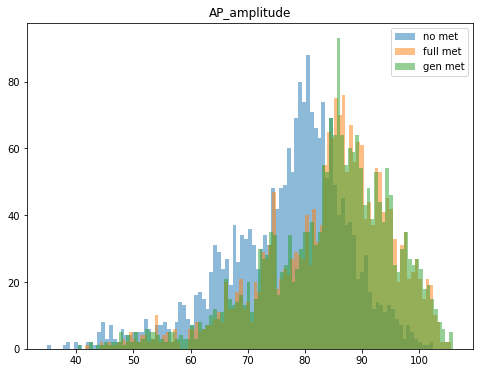

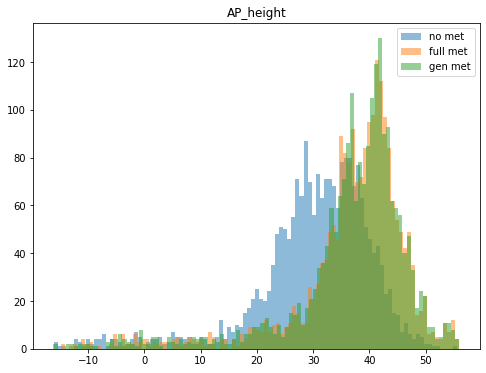

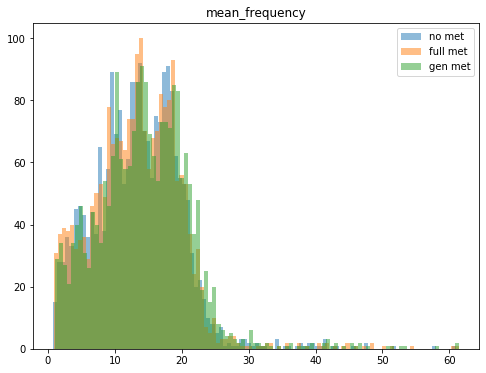

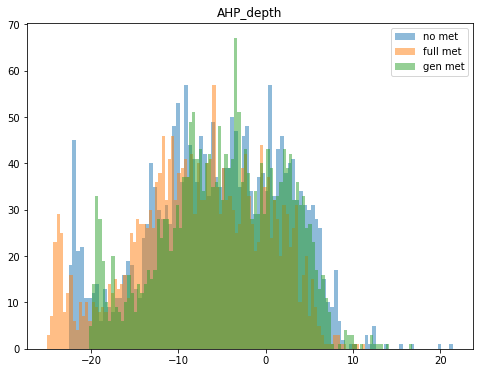

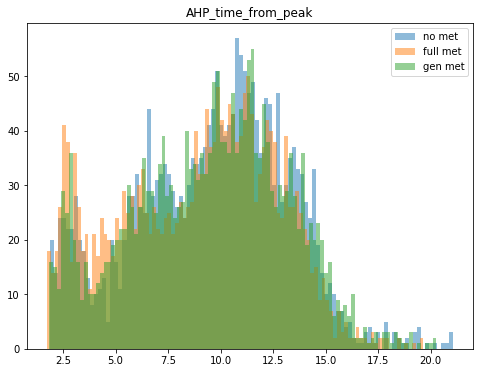

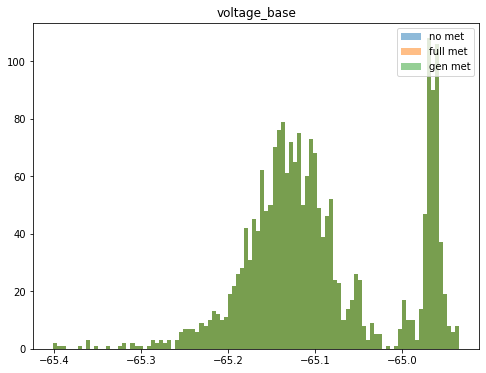

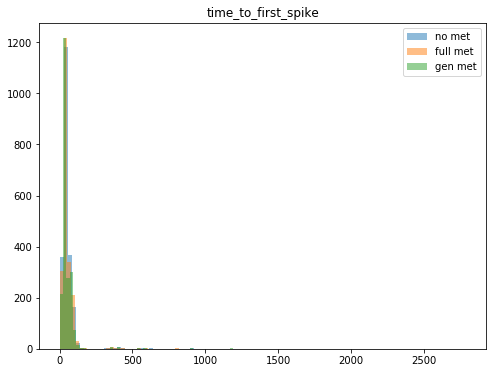

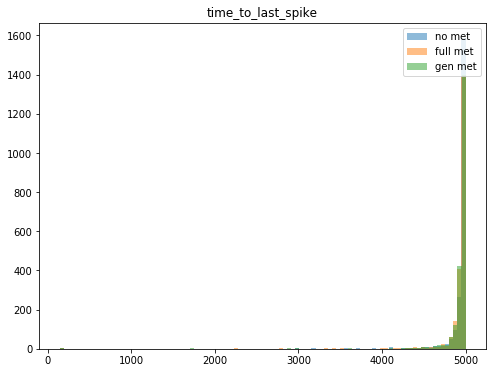

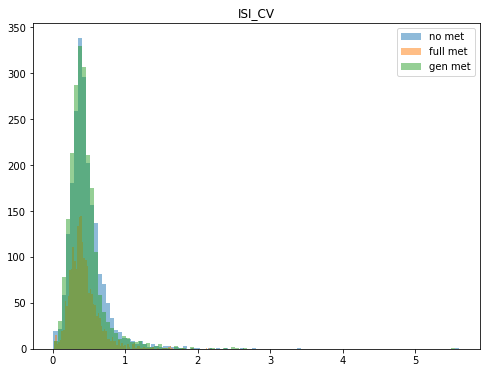

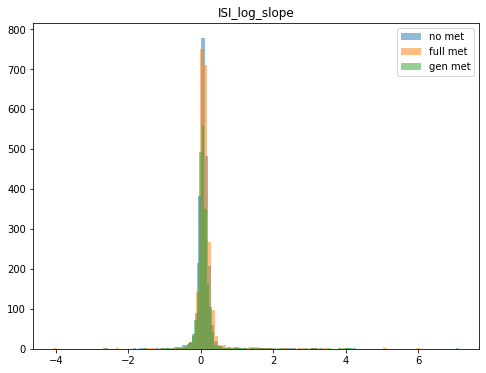

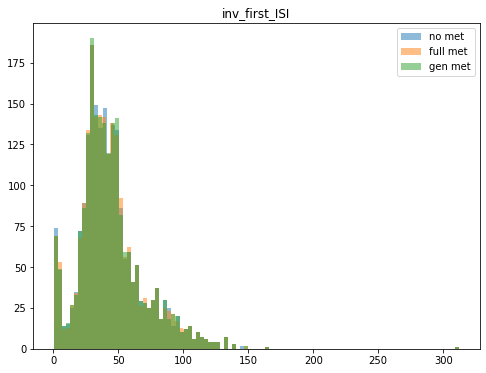

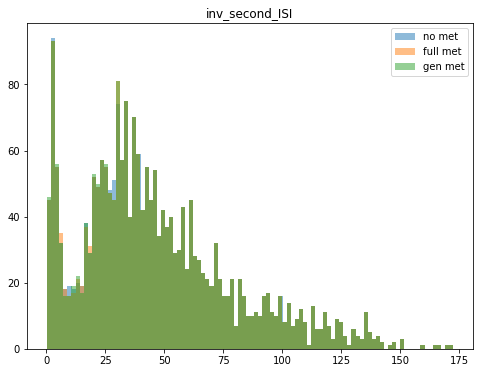

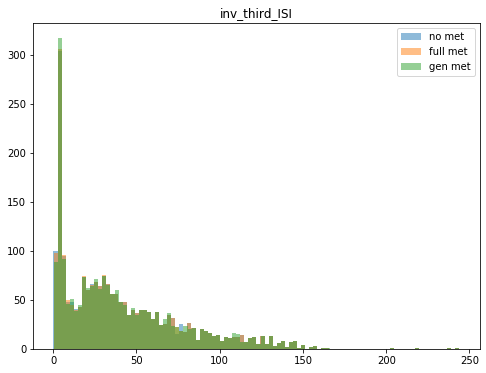

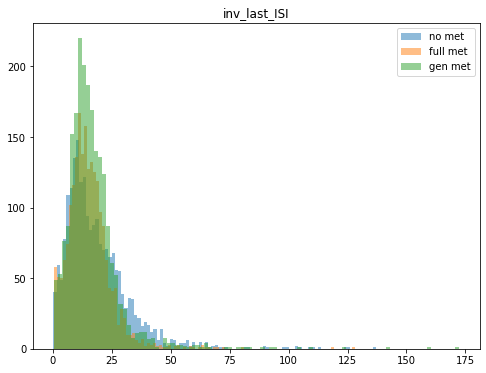

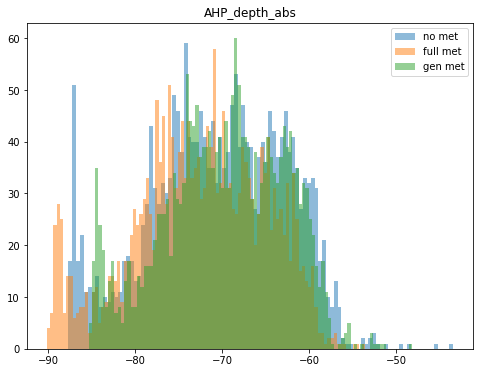

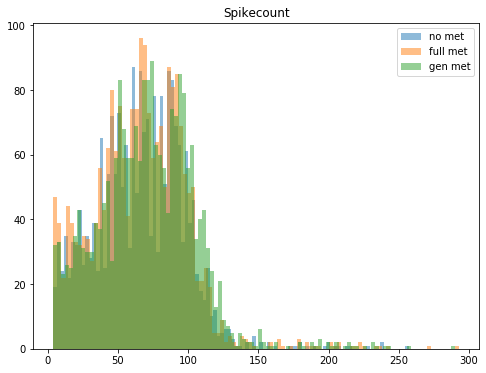

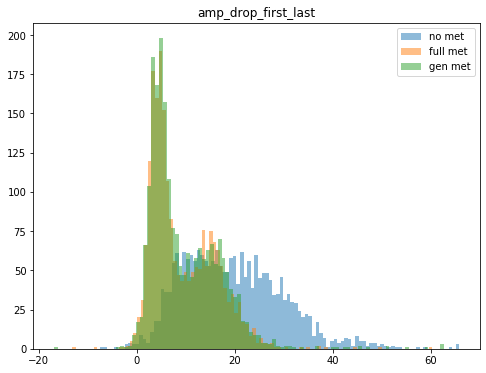

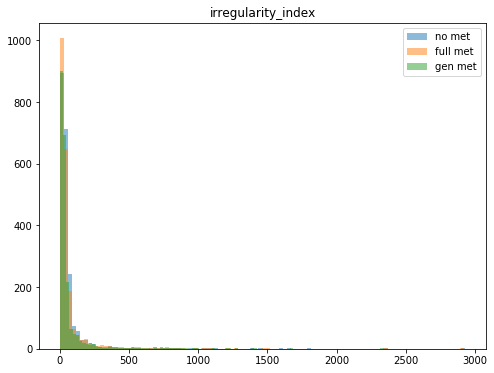

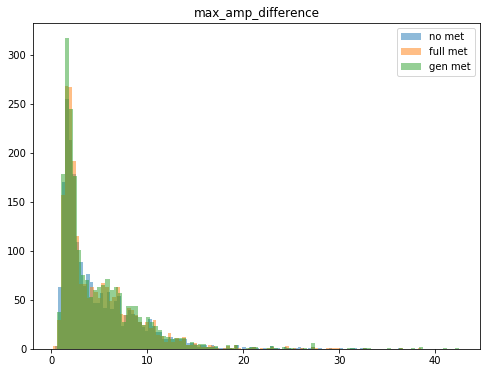

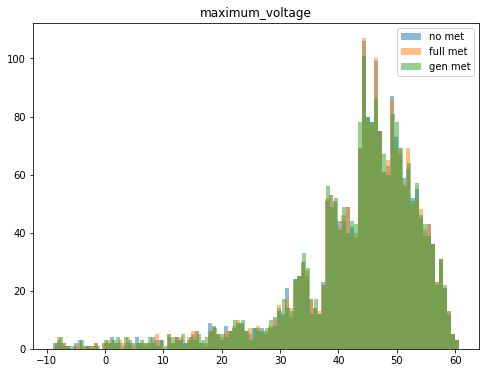

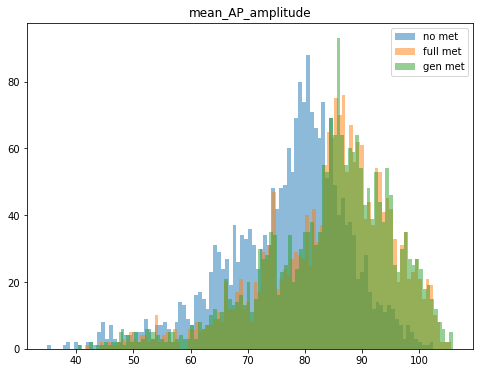

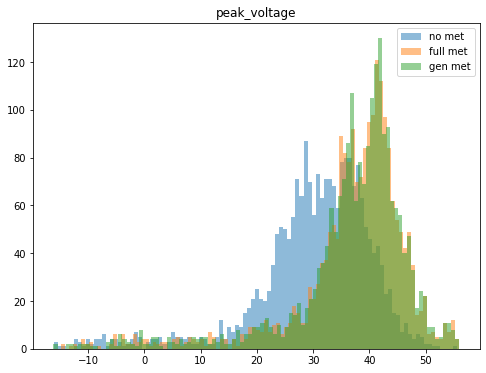

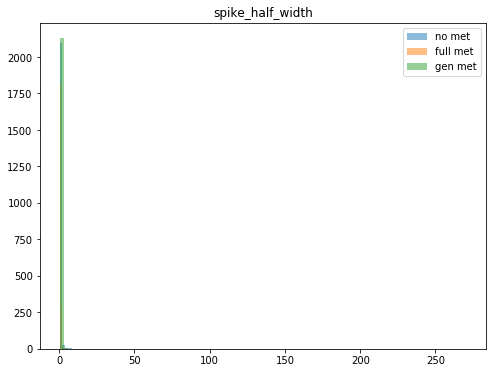

In [92]:
#d = [fr_fullMet_t, fr_genMet_t, fr_noMet_t]

#for c in fr_fullMet_t.columns[1:len(fr_fullMet_t.columns)]:
for c in ['AP_amplitude', 'AP_height', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI','inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width']:
    
    merged_d1 = pd.merge(fr_fullMet_t.loc[:,['gid',c]],fr_genMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    merged_d2 = pd.merge(merged_d1,fr_noMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    
    merged_d2['mean_full_no'] = merged_d2[[c+'_x',c]].mean(axis=1)
    merged_d2['mean_full_gen'] = merged_d2[[c+'_x',c+'_y']].mean(axis=1)
    merged_d2['mean_gen_no'] = merged_d2[[c+'_y',c]].mean(axis=1)
    
    merged_d2['no_minus_full'] = (merged_d2[c] - merged_d2[c+'_x'])/merged_d2['mean_full_no'] 
    merged_d2['full_minus_gen'] = (merged_d2[c+'_x'] - merged_d2[c+'_y'])/merged_d2['mean_full_gen']
    
    merged_d2['no_minus_gen'] = (merged_d2[c] - merged_d2[c+'_y'])/merged_d2['mean_gen_no']
    
    fig = plt.figure(figsize=(8,6))
    
    #ax = sns.displot(data=merged_d2[c]) #, kind="reg", stat_func=r2
    ax1 = plt.hist(merged_d2[c],bins=100,alpha=0.5,label='no met')
    ax2 = plt.hist(merged_d2[c+'_x'],bins=100,alpha=0.5,label = 'full met')
    ax3 = plt.hist(merged_d2[c+'_y'],bins=100,alpha=0.5,label = 'gen met')
    
    plt.legend(loc='upper right')
        
    plt.title(c)
    plt.show()

#fig.tight_layout()

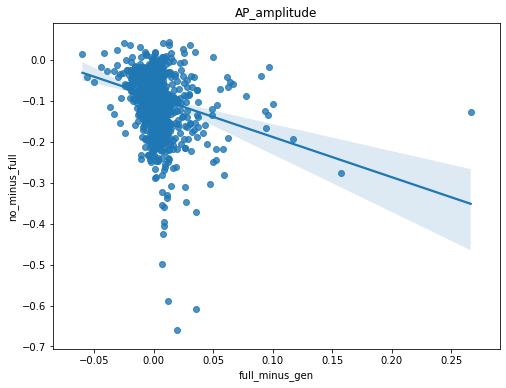

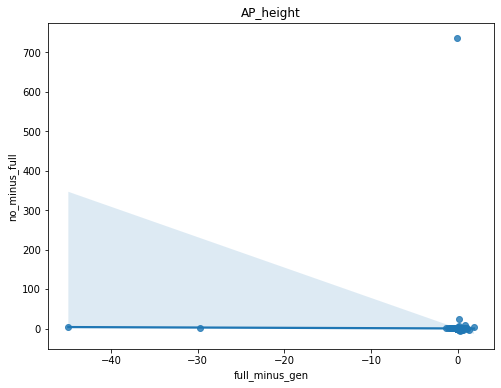

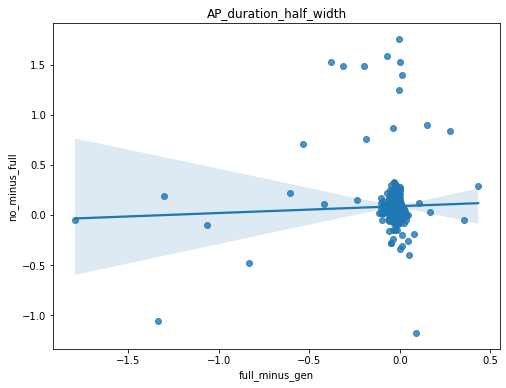

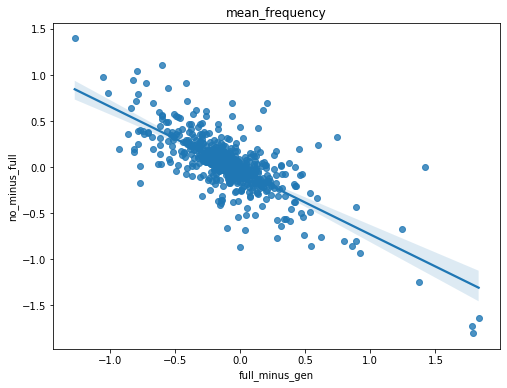

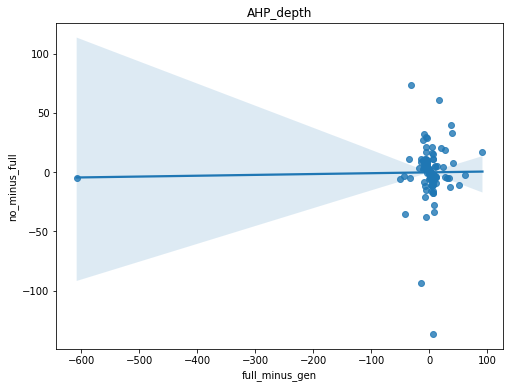

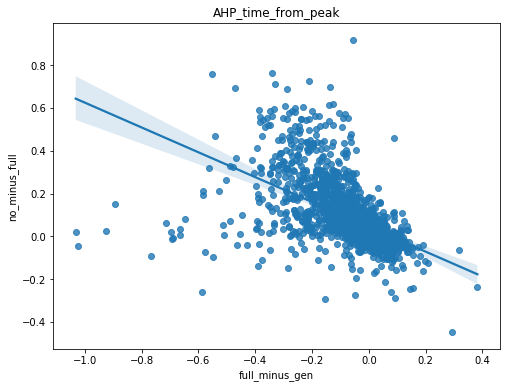

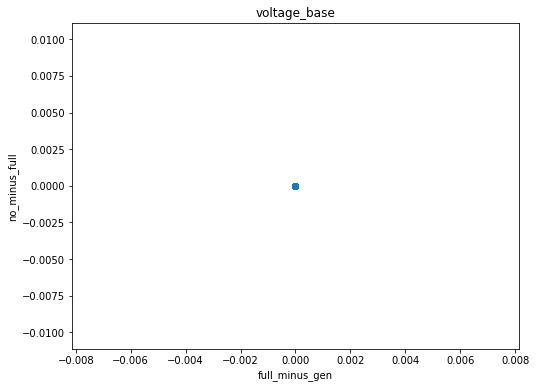

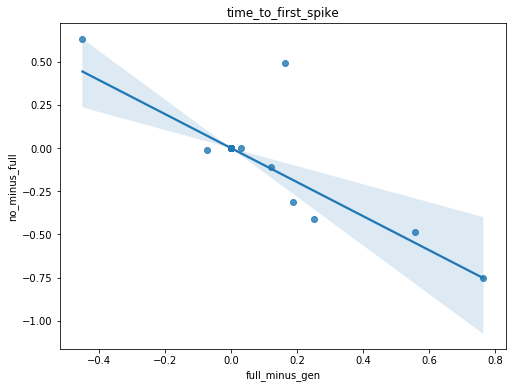

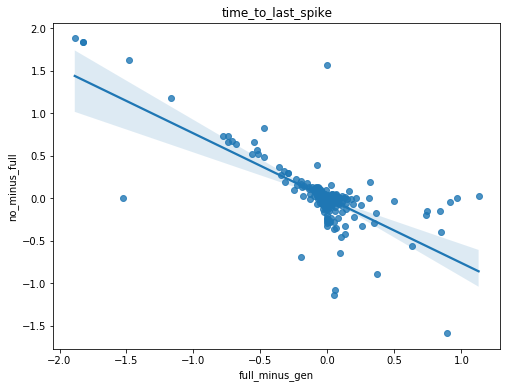

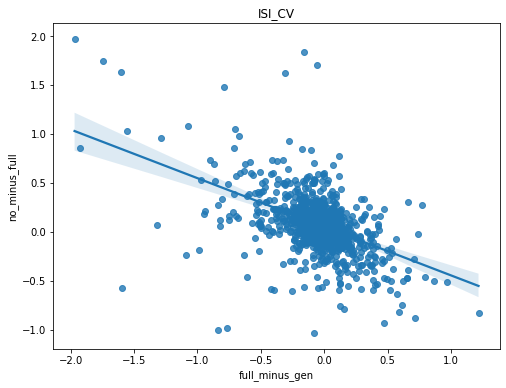

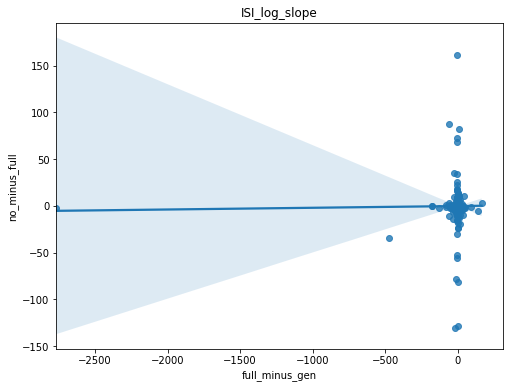

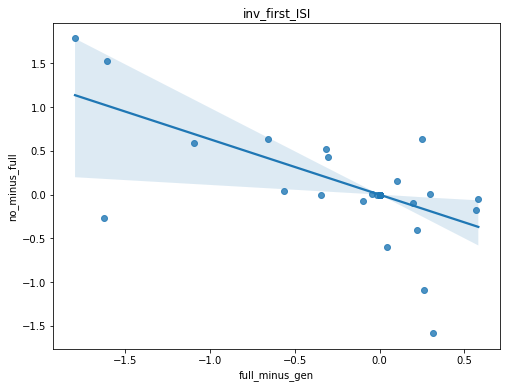

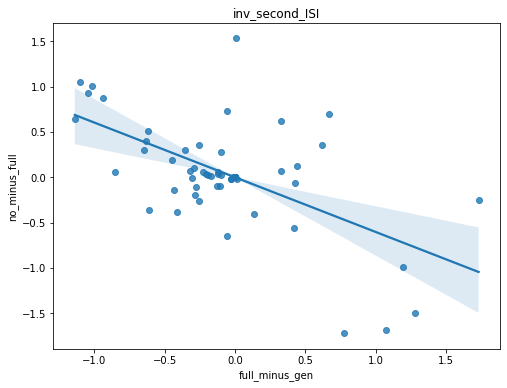

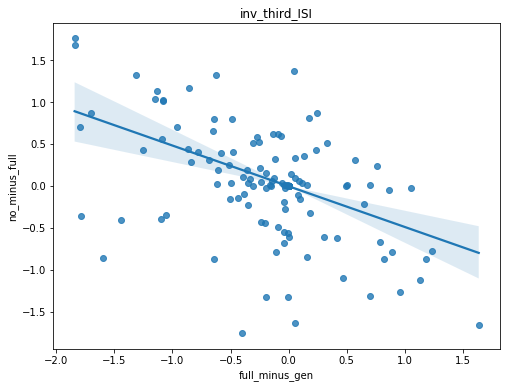

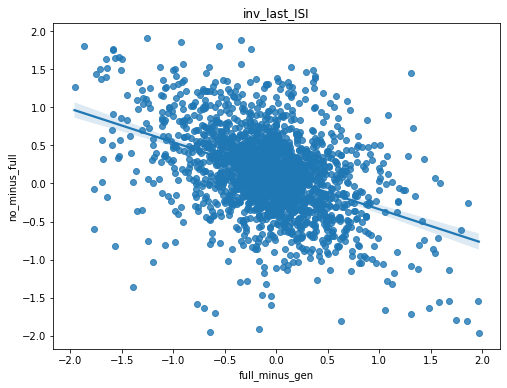

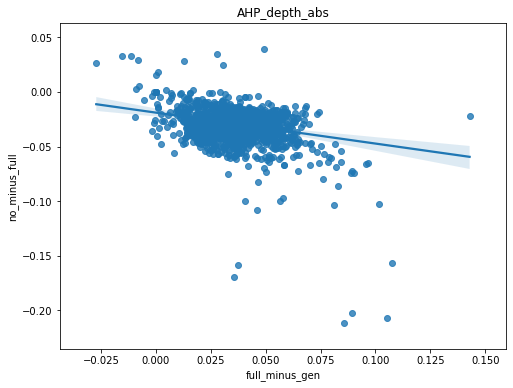

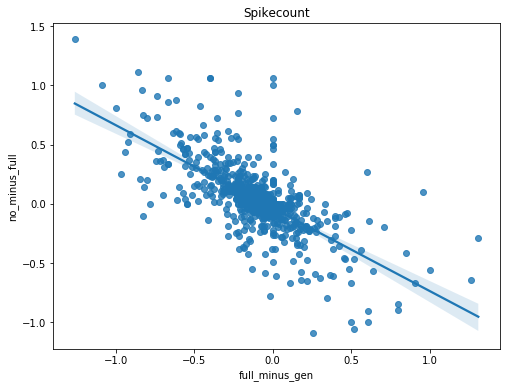

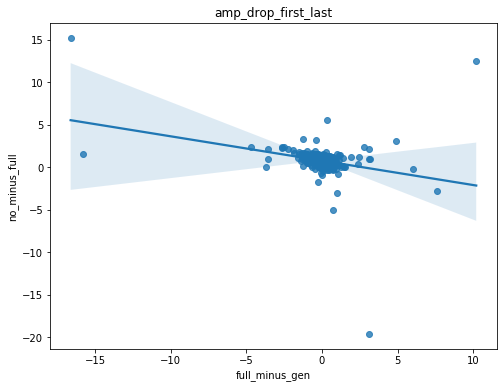

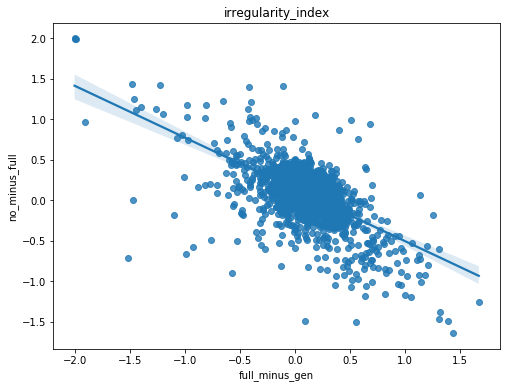

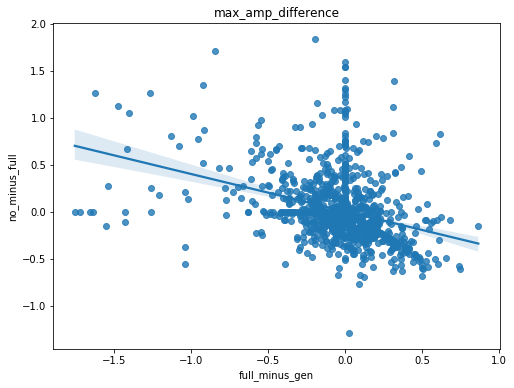

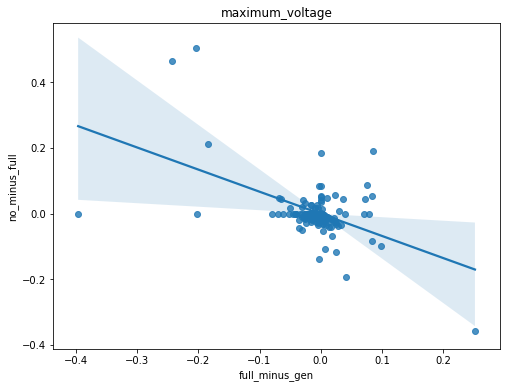

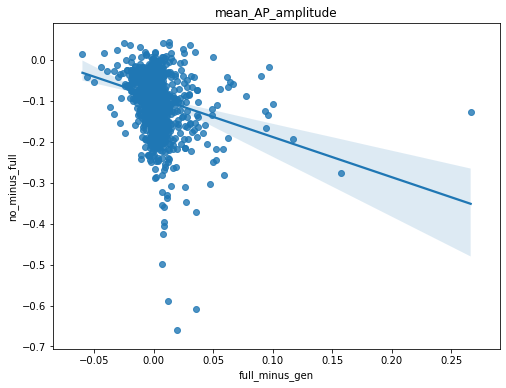

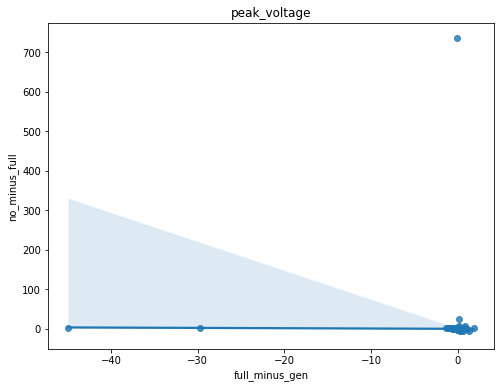

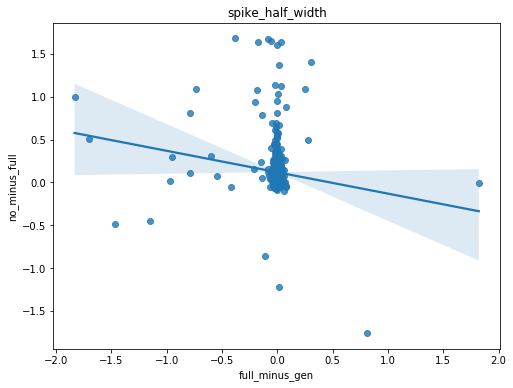

In [86]:
#d = [fr_fullMet_t, fr_genMet_t, fr_noMet_t]

#for c in fr_fullMet_t.columns[1:len(fr_fullMet_t.columns)]:
for c in ['AP_amplitude', 'AP_height', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI','inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width']:
    
    merged_d1 = pd.merge(fr_fullMet_t.loc[:,['gid',c]],fr_genMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    merged_d2 = pd.merge(merged_d1,fr_noMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    
    merged_d2['mean_full_no'] = merged_d2[[c+'_x',c]].mean(axis=1)
    merged_d2['mean_full_gen'] = merged_d2[[c+'_x',c+'_y']].mean(axis=1)
    merged_d2['mean_gen_no'] = merged_d2[[c+'_y',c]].mean(axis=1)
    
    merged_d2['no_minus_full'] = (merged_d2[c] - merged_d2[c+'_x'])/merged_d2['mean_full_no'] 
    merged_d2['full_minus_gen'] = (merged_d2[c+'_x'] - merged_d2[c+'_y'])/merged_d2['mean_full_gen']
    
    merged_d2['no_minus_gen'] = (merged_d2[c] - merged_d2[c+'_y'])/merged_d2['mean_gen_no']
    
    fig = plt.figure(figsize=(8,6))
    
    ax = sns.regplot(data=merged_d2, x='full_minus_gen',y='no_minus_full') #, kind="reg", stat_func=r2
    #ax.annotate(stats.pearsonr)


#        ax.set_xlabel('no vs full')
#        ax.set_ylabel('full vs gen')
        
    plt.title(c)
    plt.show()

#fig.tight_layout()

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pypl

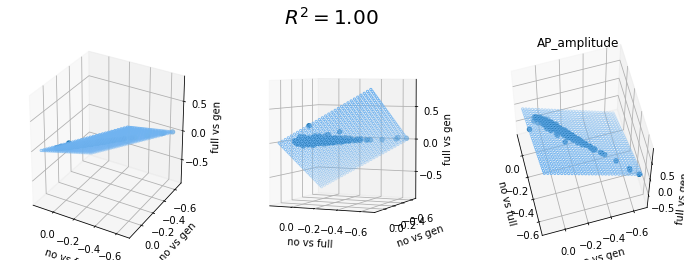

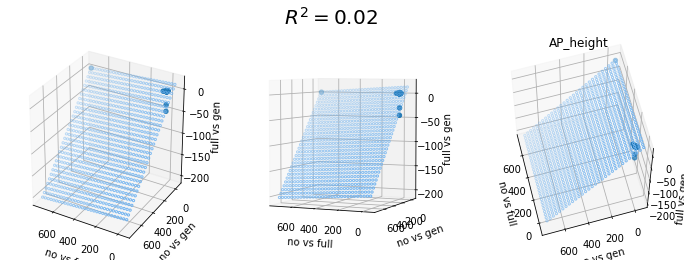

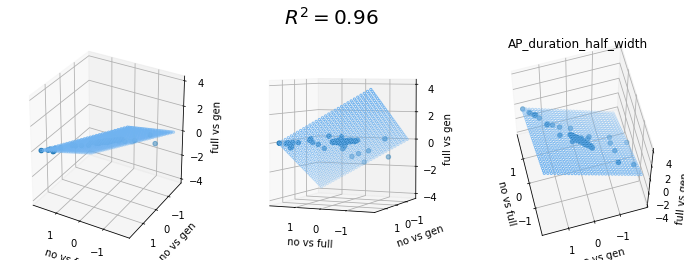

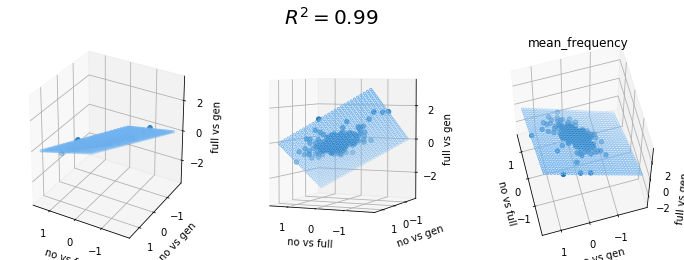

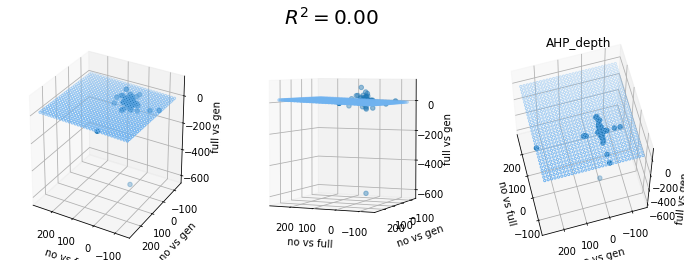

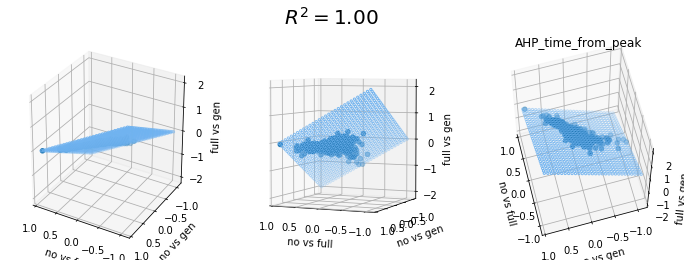

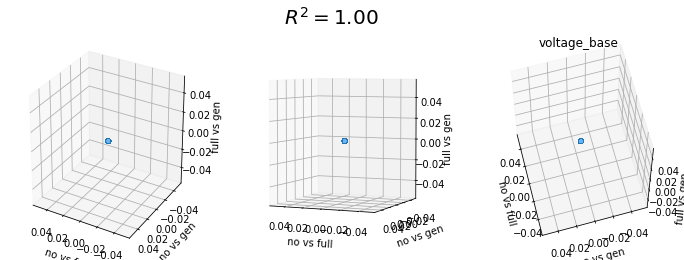

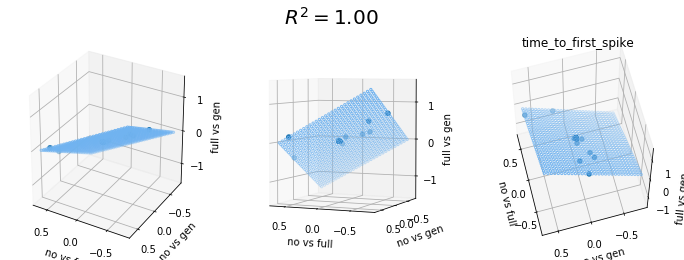

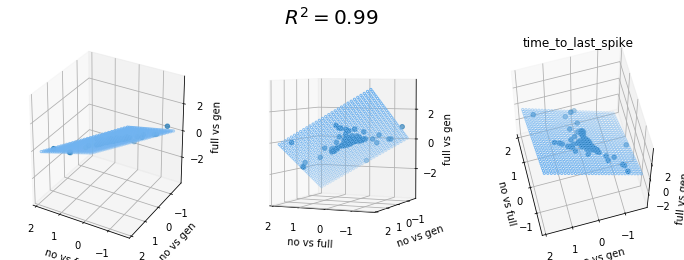

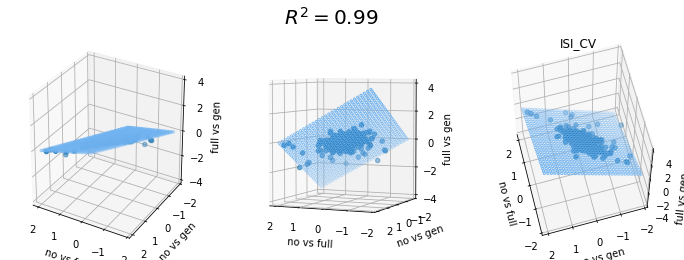

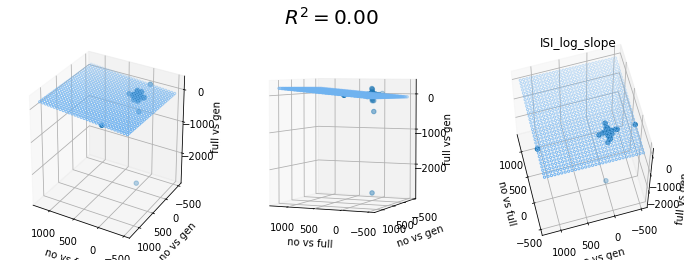

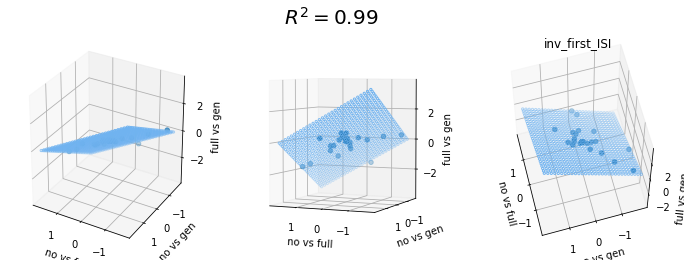

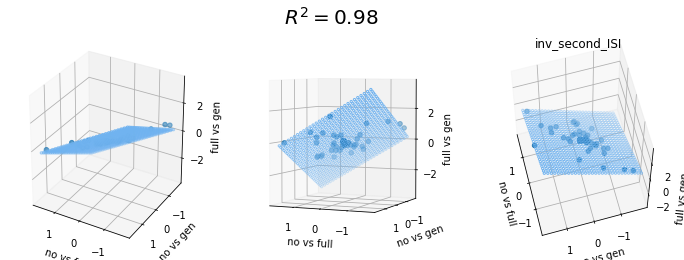

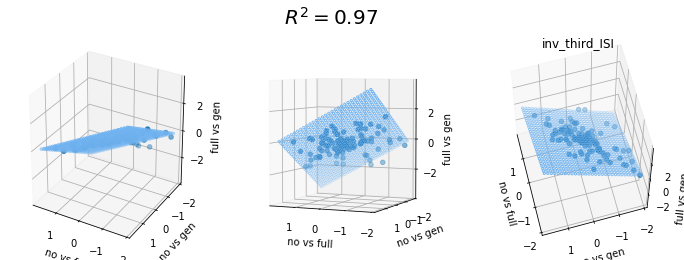

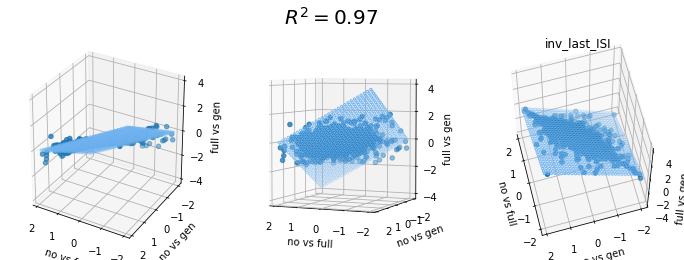

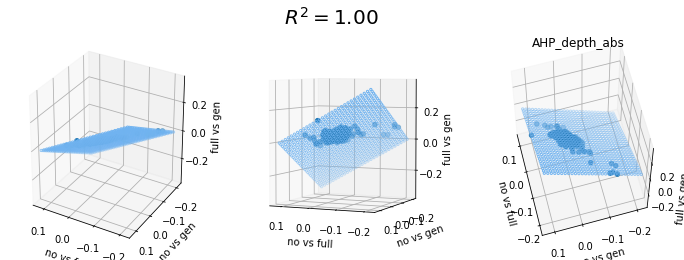

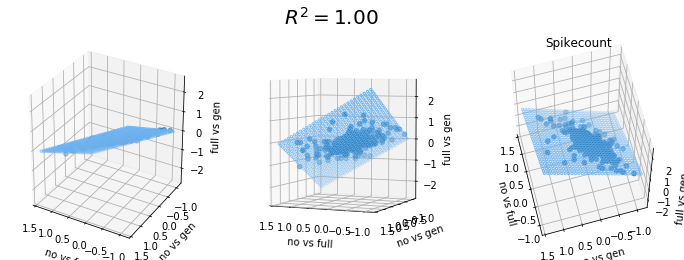

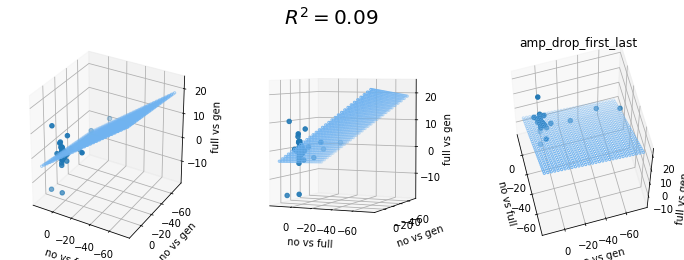

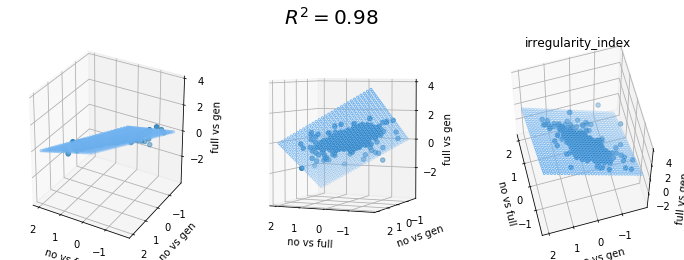

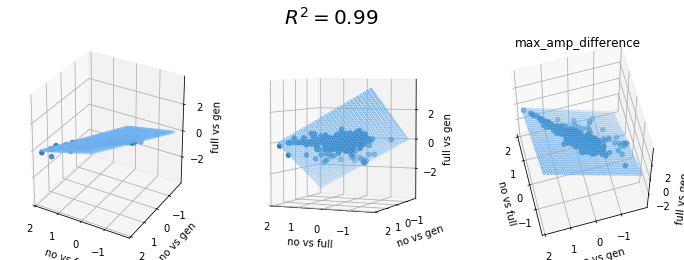

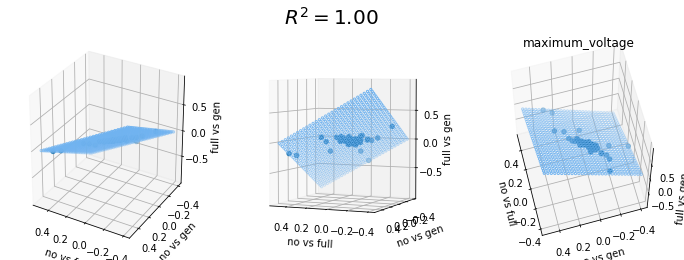

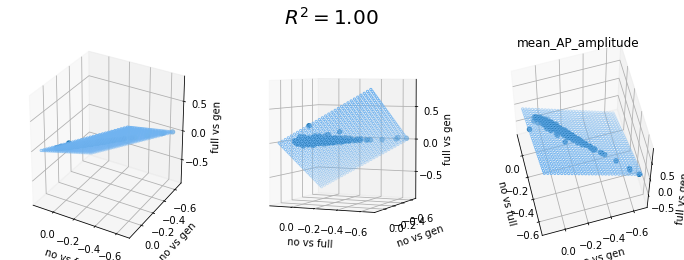

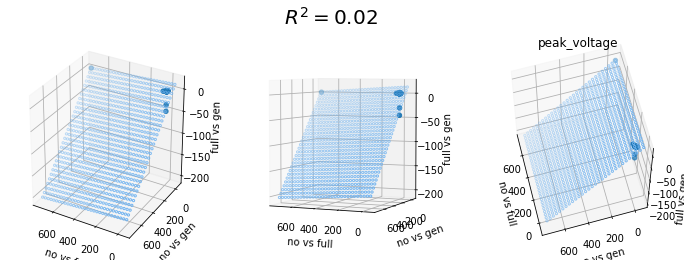

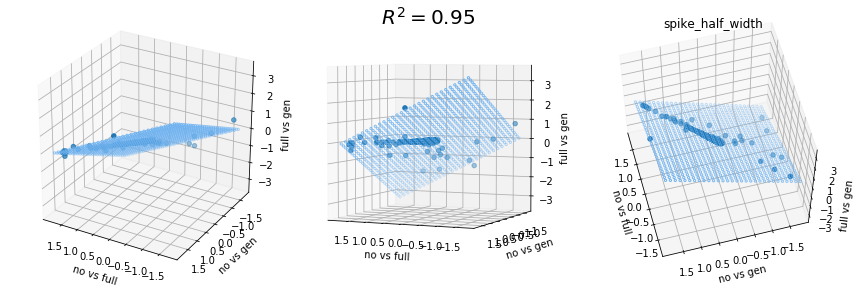

In [62]:
#d = [fr_fullMet_t, fr_genMet_t, fr_noMet_t]

#for c in fr_fullMet_t.columns[1:len(fr_fullMet_t.columns)]:
for c in ['AP_amplitude', 'AP_height', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI','inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width']:
    #print(c)
    
    merged_d1 = pd.merge(fr_fullMet_t.loc[:,['gid',c]],fr_genMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    merged_d2 = pd.merge(merged_d1,fr_noMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    
    merged_d2['mean_full_no'] = merged_d2[[c+'_x',c]].mean(axis=1)
    merged_d2['mean_full_gen'] = merged_d2[[c+'_x',c+'_y']].mean(axis=1)
    merged_d2['mean_gen_no'] = merged_d2[[c+'_y',c]].mean(axis=1)
    
    merged_d2['no_minus_full'] = (merged_d2[c] - merged_d2[c+'_x'])/merged_d2['mean_full_no'] 
    merged_d2['full_minus_gen'] = (merged_d2[c+'_x'] - merged_d2[c+'_y'])/merged_d2['mean_full_gen']
    
    merged_d2['no_minus_gen'] = (merged_d2[c] - merged_d2[c+'_y'])/merged_d2['mean_gen_no']
    
    
    #fig = plt.figure()
    #plt.plot(merged_d2['no_minus_full']/merged_d2['mean_full_no'], merged_d2['full_minus_gen']/merged_d2['mean_full_gen'],'.')
    #plt.xlabel('no vs full')
    #plt.ylabel('full vs gen')
    #plt.title(c)
    #plt.show()
    
    #fig = plt.figure()
    #plt.plot(merged_d2['no_minus_gen']/merged_d2['mean_gen_no'], merged_d2['full_minus_gen']/merged_d2['mean_full_gen'],'.')
    #plt.xlabel('no vs gen')
    #plt.ylabel('full vs gen')
    #plt.title(c)
    #plt.show()
    
    
    fig = plt.figure(figsize=(12,4))
    
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:

        ax.scatter(merged_d2['no_minus_full'],
                   merged_d2['no_minus_gen'],
                   merged_d2['full_minus_gen'])


        #for regr:
        x_pred = np.linspace(merged_d2[['no_minus_full','no_minus_gen']].values.min(), merged_d2[['no_minus_full','no_minus_gen']].values.max(), 30)   
        y_pred = np.linspace(merged_d2[['no_minus_full','no_minus_gen']].values.min(), merged_d2[['no_minus_full','no_minus_gen']].values.max(), 30)  
        xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
        model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

        ols = linear_model.LinearRegression()
        model = ols.fit(merged_d2[['no_minus_full','no_minus_gen']],merged_d2['full_minus_gen'])
        predicted = model.predict(model_viz)

        r2 = model.score(merged_d2[['no_minus_full','no_minus_gen']],merged_d2['full_minus_gen']) # Evaluate
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=5, edgecolor='#70b3f0')


        ax.set_xlabel('no vs full')
        ax.set_ylabel('no vs gen')
        ax.set_zlabel('full vs gen')
        
    plt.title(c)

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)
    
    fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/jupyter_py_venv_ood/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pypl

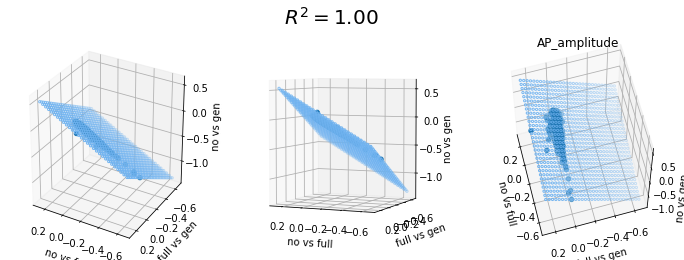

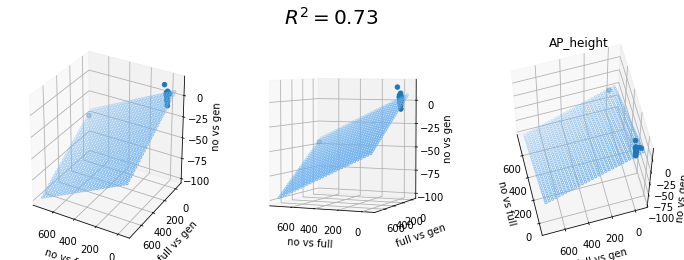

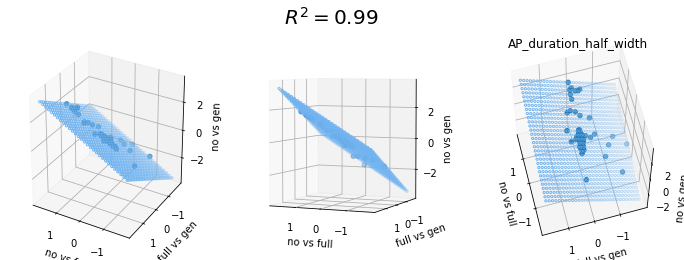

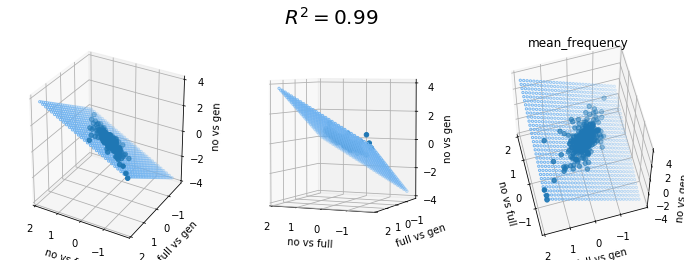

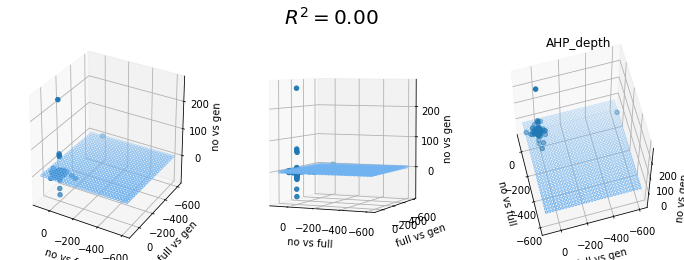

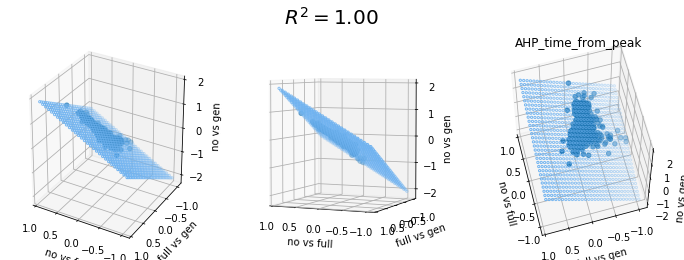

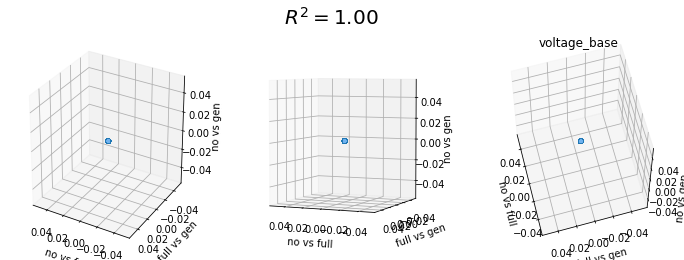

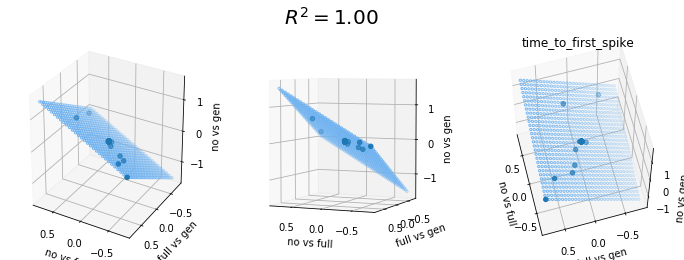

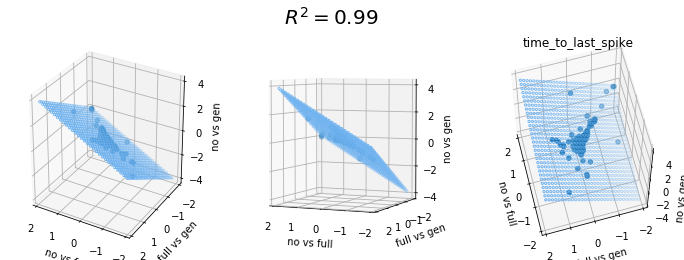

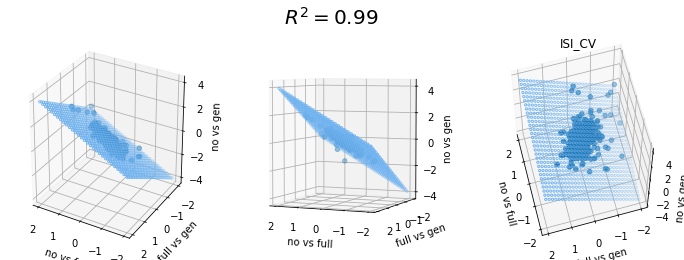

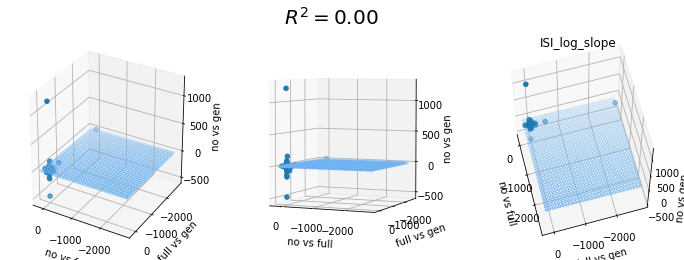

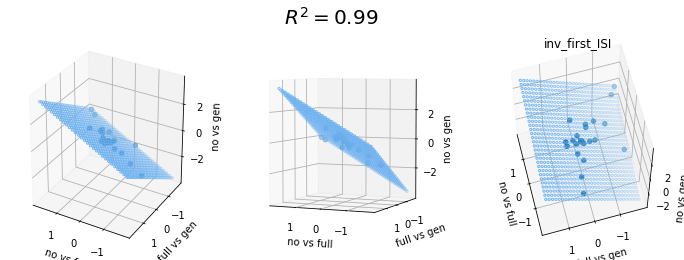

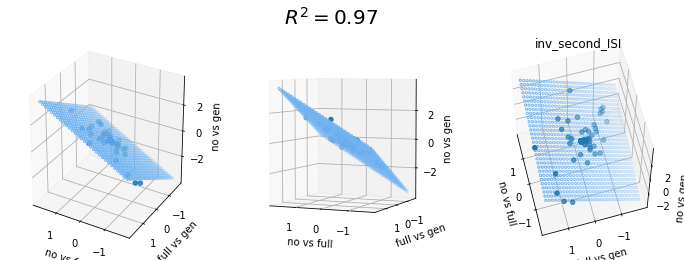

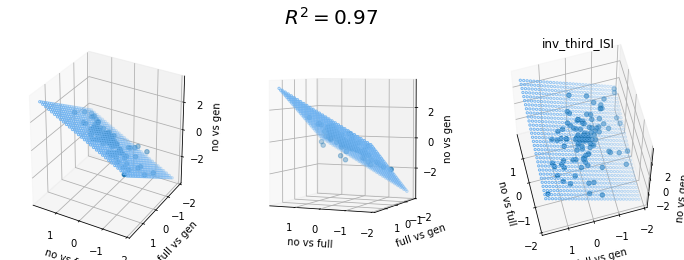

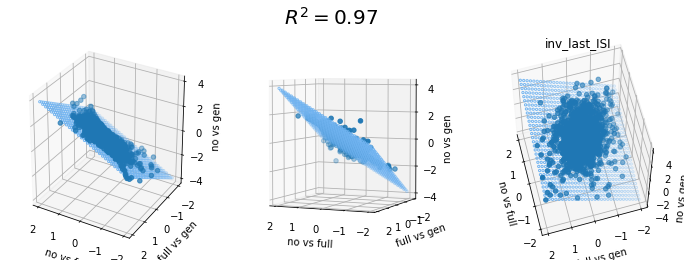

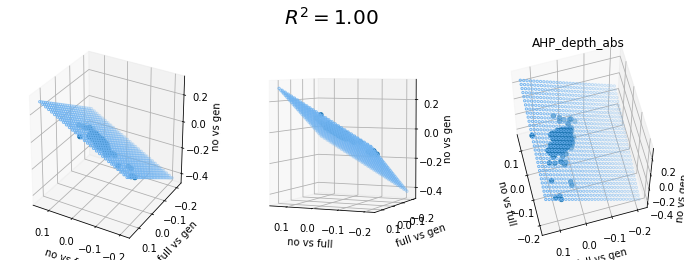

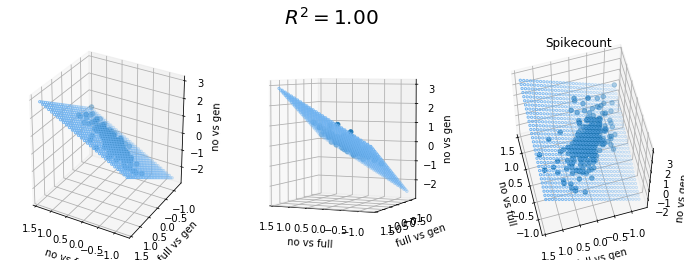

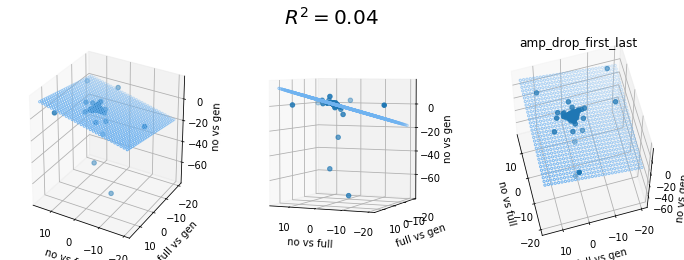

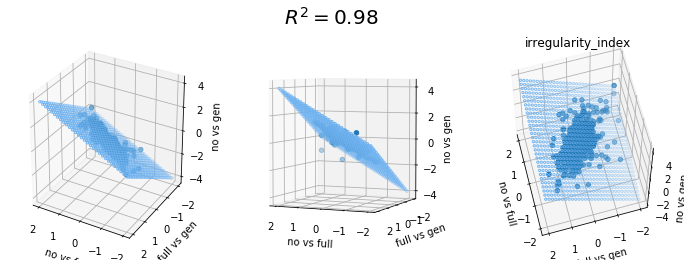

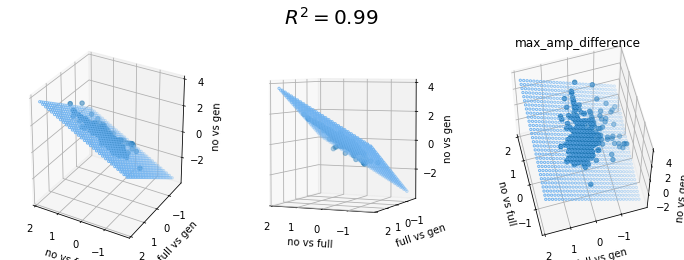

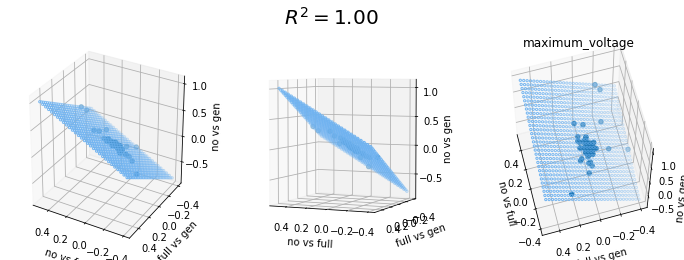

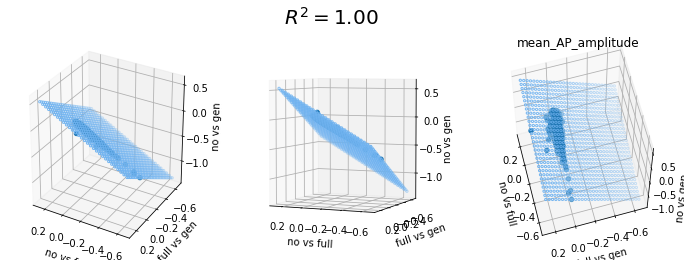

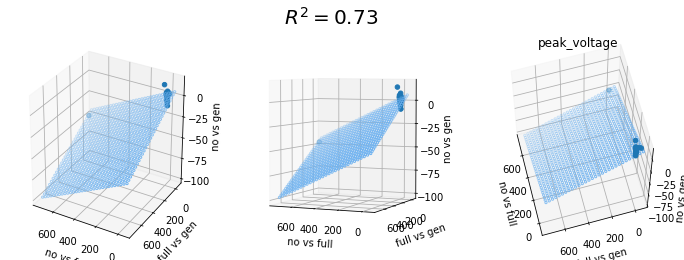

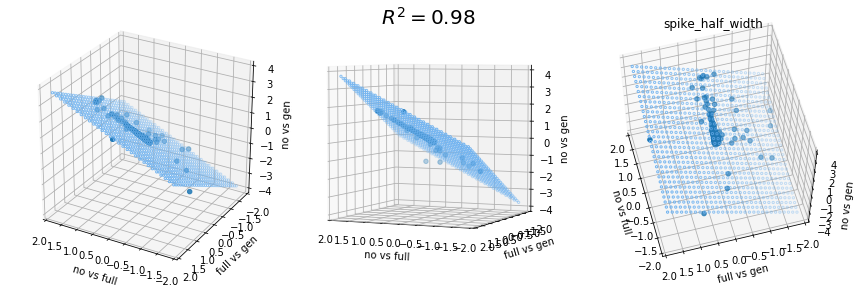

In [65]:
#d = [fr_fullMet_t, fr_genMet_t, fr_noMet_t]

#for c in fr_fullMet_t.columns[1:len(fr_fullMet_t.columns)]:
for c in ['AP_amplitude', 'AP_height', 'AP_duration_half_width', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI','inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width']:
    #print(c)
    
    merged_d1 = pd.merge(fr_fullMet_t.loc[:,['gid',c]],fr_genMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    merged_d2 = pd.merge(merged_d1,fr_noMet_t.loc[:,['gid',c]],left_on='gid',right_on='gid',how='inner')
    
    merged_d2['mean_full_no'] = merged_d2[[c+'_x',c]].mean(axis=1)
    merged_d2['mean_full_gen'] = merged_d2[[c+'_x',c+'_y']].mean(axis=1)
    merged_d2['mean_gen_no'] = merged_d2[[c+'_y',c]].mean(axis=1)
    
    merged_d2['no_minus_full'] = (merged_d2[c] - merged_d2[c+'_x'])/merged_d2['mean_full_no'] 
    merged_d2['full_minus_gen'] = (merged_d2[c+'_x'] - merged_d2[c+'_y'])/merged_d2['mean_full_gen']
    
    merged_d2['no_minus_gen'] = (merged_d2[c] - merged_d2[c+'_y'])/merged_d2['mean_gen_no']
    
    
    #fig = plt.figure()
    #plt.plot(merged_d2['no_minus_full']/merged_d2['mean_full_no'], merged_d2['full_minus_gen']/merged_d2['mean_full_gen'],'.')
    #plt.xlabel('no vs full')
    #plt.ylabel('full vs gen')
    #plt.title(c)
    #plt.show()
    
    #fig = plt.figure()
    #plt.plot(merged_d2['no_minus_gen']/merged_d2['mean_gen_no'], merged_d2['full_minus_gen']/merged_d2['mean_full_gen'],'.')
    #plt.xlabel('no vs gen')
    #plt.ylabel('full vs gen')
    #plt.title(c)
    #plt.show()
    
    
    fig = plt.figure(figsize=(12,4))
    
    ax1 = fig.add_subplot(131, projection='3d')
    ax2 = fig.add_subplot(132, projection='3d')
    ax3 = fig.add_subplot(133, projection='3d')

    axes = [ax1, ax2, ax3]

    for ax in axes:

        ax.scatter(merged_d2['no_minus_full'],
                   merged_d2['full_minus_gen'],
                   merged_d2['no_minus_gen'])


        #for regr:
        x_pred = np.linspace(merged_d2[['no_minus_full','full_minus_gen']].values.min(), merged_d2[['no_minus_full','full_minus_gen']].values.max(), 30)   
        y_pred = np.linspace(merged_d2[['no_minus_full','full_minus_gen']].values.min(), merged_d2[['no_minus_full','full_minus_gen']].values.max(), 30)  
        xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
        model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

        ols = linear_model.LinearRegression()
        model = ols.fit(merged_d2[['no_minus_full','full_minus_gen']],merged_d2['no_minus_gen'])
        predicted = model.predict(model_viz)

        r2 = model.score(merged_d2[['no_minus_full','full_minus_gen']],merged_d2['no_minus_gen']) # Evaluate
        ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=5, edgecolor='#70b3f0')


        ax.set_xlabel('no vs full')
        ax.set_ylabel('full vs gen')
        ax.set_zlabel('no vs gen')
        
    plt.title(c)

    ax1.view_init(elev=28, azim=120)
    ax2.view_init(elev=4, azim=114)
    ax3.view_init(elev=60, azim=165)
    
    fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [ ]:
# scatterplots for all features: x=(full-no)/mean(full,no), y=(full-gen)/mean(full,gen)
# scatterplots for all features: x=(gen-no)/mean(gen,no), y=(gen-full)/mean(gen,full)

In [15]:
fr_noMet_t.columns

Index(['gid', 'AP_amplitude', 'AP_height', 'AP_duration_half_width',
       'mean_frequency', 'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'mean_AP_amplitude', 'peak_voltage',
       'spike_half_width'],
      dtype='object')

In [22]:
bins = 100 #numpy.linspace(min(), 10, 100)


plt.hist(fr_fullMet_t['mean_frequency'], 
         weights=np.ones(len(fr_fullMet_t['mean_frequency'])) / len(fr_fullMet_t['mean_frequency']),
         bins=bins, alpha=0.5, label='full met')

plt.hist(fr_genMet_t['mean_frequency'], 
         weights=np.ones(len(fr_genMet_t['mean_frequency'])) / len(fr_genMet_t['mean_frequency']),
         bins=bins, alpha=0.5, label='gen met')


plt.hist(fr_noMet_t['mean_frequency'], 
         weights=np.ones(len(fr_noMet_t['mean_frequency'])) / len(fr_noMet_t['mean_frequency']),
         bins=bins, alpha=0.5, label='no met')

plt.legend(loc='upper right')
plt.show()

In [21]:
bins = 100 #numpy.linspace(min(), 10, 100)


plt.hist(fr_fullMet_t.loc[fr_fullMet_t['mean_frequency']<100,'mean_frequency'], 
         weights=np.ones(len(fr_fullMet_t.loc[fr_fullMet_t['mean_frequency']<100,'mean_frequency'])) / len(fr_fullMet_t.loc[fr_fullMet_t['mean_frequency']<100,'mean_frequency']),
         bins=bins, alpha=0.5, label='full met')

plt.hist(fr_genMet_t.loc[fr_genMet_t['mean_frequency']<100,'mean_frequency'], 
         weights=np.ones(len(fr_genMet_t.loc[fr_genMet_t['mean_frequency']<100,'mean_frequency'])) / len(fr_genMet_t.loc[fr_genMet_t['mean_frequency']<100,'mean_frequency']),
         bins=bins, alpha=0.5, label='gen met')


plt.hist(fr_noMet_t.loc[fr_noMet_t['mean_frequency']<100,'mean_frequency'], 
         weights=np.ones(len(fr_noMet_t.loc[fr_noMet_t['mean_frequency']<100,'mean_frequency'])) / len(fr_noMet_t.loc[fr_noMet_t['mean_frequency']<100,'mean_frequency']),
         bins=bins, alpha=0.5, label='no met')

plt.legend(loc='upper right')
plt.show()